In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Outer Leon Weather Exploratory Data Analysis Notebook

This analysis is performed for Viviendas Leon's partnered farm families in outer Leon area of Nicaragua. Historical weather data was collected on Psoltega and Quezalguaque (Que-sal-gua-que) municipalities of Leon from 2017 to 2021. This data was collected from World Weather Online's API. Data is then joined to recorded family farm's data (vl_2017to19) using the date index provided.

Analysis is to determine correlations between weather factors (i.e. temperature, humidity) on crop health. 

*Files -- for manual import:*

*   vl_2017to19.xlsx
*   vl_2019to20.xlsx
*   Participant List2017to21.xlsx


  
  

In [ ]:
cd sample_data/


/content/sample_data


In [ ]:
vl17to19 = pd.read_excel('vl_2017to19.xlsx', sheet_name=1)
vl19to20 = pd.read_excel('vl_2019to20.xlsx', sheet_name=1)
frames = [vl17to19, vl19to20]
vl17to20 = pd.concat(frames)

# Full participant name list
vl_partic = pd.read_excel('Participant List2017to21.xlsx')
vl_names = vl_partic[5][1:-3]
vl_names = vl_names.tolist()

In [ ]:
vl17to20 = vl17to20.replace(
    ['arelis', 'arelis  solis', 'arelis solis',
       'arelis soliz', 'areliz solis', 'arlelis solis'], 'arelis solis')

vl17to20 = vl17to20.replace(
    ['freddy', 'freddy lanza', 'freddy lanzas',
       'freddy lasza', 'freddys campo', 'fredi ', 'fredis ',
       'fredis lanza', 'fredy lanzas', 'fredys'], 'freddy lanza')

vl17to20 = vl17to20.replace(
    ['helen espinoza', 'hellen', 'hellen espinoza', ], 'hellen espinoza')

vl17to20 = vl17to20.replace(
    ['johana', 'johana  salgado','johana salgado', 'johanna salgado', 'yohana salgado'], 'johana salgado')

vl17to20 = vl17to20.replace(
    ['juan sandobal', 'juan sandoval'], 'juan sandoval')

vl17to20 = vl17to20.replace(
    ['maria jose', 'maria jose roque',
       'maria jose roque ', 'mariajose roque', ',maria jose roque', ], 'maria jose roque')

vl17to20 = vl17to20.replace(
    ['marvin toval', 'marvin toval padilla'], 'marvin toval padilla')

vl17to20 = vl17to20.replace(
    ['naideling', 'naideling vargas', 'naidelyn', 'naidelyn vargas', 'naidelyng', 'naidelyng ', 'naidelyng vargas', 'naydelin', 'naydelin varga', 'naydeling', 'naydeling varga', 'naydeling vargas', 'nayeling varga’, ‘neilyng', 'ávila vargas'
], 'naydeling vargas')

vl17to20 = vl17to20.replace(
    ['nayeli roque','nayelis  roque', 'nayelis roque', 'nayelis roqur', 'nerlyn roque',
], 'nayelis roque')

vl17to20 = vl17to20.replace(
    ['nerligh hernandez', 'nerling henandez', 'nerling hernandez',
       'nerlyn hernandez', 'nerlynh hernandez',], 'nerling hernandez')

vl17to20 = vl17to20.replace(
    ['rayson membreño', 'reison membreño', 'reison membreńo',
       'reysom membreño', 'reyson membrecho', 'reyson membreño',
       'reyson membreńo', 'reyson menbreño'], 'reysom membreño')

vl17to20 = vl17to20.replace(
    ['yader  morales', 'yader morales', 'yader morales ',
       'yadermorales', ], 'yader morales')

In [ ]:
vl17to20['Familia visitada'] = vl17to20['Familia visitada'].str.lower()
listed_names = vl17to20['Familia visitada'].unique()
print(len(listed_names))


listed_names.sort()
listed_names

51


array(['ana catalina garcía millón', 'anielka morales', 'arelis solis',
       'aura estela sevilla', 'claudia barrera', 'claudia espinoza',
       'claudia flavia arévalo', 'cristina alvares solís',
       'daisy ramirez', 'danelia martinez', 'dilenia velásquez',
       'elizabeth castillo', 'emilio centeno', 'exania estrada',
       'ezequiel rivas', 'freddy lanza', 'glenda mercado',
       'hellen espinoza', 'johana cristina altamirano flores',
       'johana salgado', 'jose salazar', 'juan sandoval',
       'karla galiano martínez', 'lesbia morales', 'luz marina rivas',
       'margin toval', 'maria cristina avendaño', 'maria jose roque',
       'martha ramos', 'marvin toval padilla', 'maría de fátima castillo',
       'maría eugenia morales', 'melania jacoba', 'mercedes salgado',
       'milena maradiaga', 'naydeling vargas', 'nayeling varga',
       'nayelis roque', 'neilyng', 'nerling hernandez', 'oralia ramirez',
       'patricia trujillo', 'rebeca morales', 'reysom membreño',


In [ ]:
families_coordinates = pd.read_csv('FamilyName_withCoords.csv')
families_coordinates['Name'] = families_coordinates['Name'].str[8:]
families_coordinates['Name'] = families_coordinates['Name'].str.lower()
families_coordinates = families_coordinates.replace(
    ['Fátima Castillo'], 'maría de fátima castillo')

In [ ]:
families_coordinates = families_coordinates.replace(
    ['fátima castillo'], 'maría de fátima castillo')
families_coordinates = families_coordinates.replace(
    ['yojhana  cristina flores'], 'johana cristina altamirano flores')

families_coordinates

,Unnamed: 0,Name,geometry
0,0,rebeca sequeira,POINT (-86.95236730000001 12.4635646)
1,1,maría de fátima castillo,POINT (-86.9832019 12.4433067)
2,2,yojhana cristina flores,POINT (-86.9963934 12.4609104)
3,3,karla galeano,POINT (-86.9968179 12.4551053)
4,4,rita arevalo,POINT (-86.9966864 12.4543169)
5,5,cristina alvares,POINT (-86.99857489999999 12.4516219)
6,6,luz marina rivas,POINT (-86.9503749 12.451799)
7,7,claudia arevalo,POINT (-86.998481 12.4539293)
8,8,glenda mercado,POINT (-86.9551455 12.4584886)
9,9,silvia elena moran,POINT (-86.9519736 12.452459)


In [ ]:
# Uploading weather data

wposoltega = pd.read_csv('PosoltegaWeather17to21.csv')
w1244_8694 = pd.read_csv('12.44%-86.94.csv')
w1244_8698 = pd.read_csv('12.44%-86.98.csv')
w1244_8700 = pd.read_csv('12.44%-87.0.csv')
w1246_8695 = pd.read_csv('12.45%-86.95.csv')

w1245_8699 = pd.read_csv('12.45%-86.99.csv')
w1245_8700 = pd.read_csv('12.45%-87.0.csv')
w1246_8695 = pd.read_csv('12.46%-86.95.csv')
w1246_8696 = pd.read_csv('12.46%-86.96.csv')

w1246_8700 = pd.read_csv('12.46%-87.0.csv')
w1247_8695 = pd.read_csv('12.47%-86.95.csv')
w1248_8695 = pd.read_csv('12.48%-86.95.csv')
w1248_8696 = pd.read_csv('12.48%-86.96.csv')

Retouching Weather Datasets

In [ ]:
#creating formatted Timestamp column, using s(tr) input
wposoltega['DateTime'] = pd.to_datetime(wposoltega.date_time)
# que_weather['DateTime'] = pd.to_datetime(que_weather.date_time)

In [ ]:
merged = pd.merge(vl17to20, wposoltega, left_on="Fecha Visita", right_on="DateTime")

In [ ]:
merged['% Enfermedad.1'] = merged['% Enfermedad.1'].fillna(0).astype(str)
merged['% Enfermedad.1'] = merged['% Enfermedad.1'].str.extract('(\d+)', expand=False)
merged['% Enfermedad.1'] = merged['% Enfermedad.1'].fillna(0).astype(str)
merged['% Enfermedad.1'] = merged['% Enfermedad.1'].astype(int)

In [ ]:
merged['% Enfermedad.1'] = merged['% Enfermedad.1'].astype(int)

In [ ]:
df.plot(x='% Enfermedad.1', y='col_name_2', style='o')

In [ ]:
merged.columns

Index(['Fecha Visita', 'Auditor', 'Unnamed: 2', 'Comunidad',
       'Familia visitada', 'Presente?', 'Fruta', 'Estado', '% Enfermedad',
       'Calidad', 'Unnamed: 10', 'Plaga', 'Recomendacion Organico',
       'Recomendacion Quimico', 'Vegetales', 'Estado.1', '% Enfermedad.1',
       'Calidad.1', 'Plaga.1', 'Recomendacion Organico.1',
       'Recomendacion Quimico.1', 'Legumes and seeds', 'Estado.2',
       '% Enfermedad.2', 'Calidad.2', 'Plaga.2', 'Recomendacion Organico.2',
       'Recomendacion Quimico.2', 'Gramíneos', 'Estado.3', '% Enfermedad.3',
       'Calidad.3', 'Plaga.3', 'Recomendacion Organico.3',
       'Recomendacion Quimico.3', 'Comentarios/Observaciones Adicionales',
       'Respuesta / Seguimiento a comentarios', 'Leguminosas y semillas',
       'date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustK

In [ ]:
merged

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Fruta,Estado,% Enfermedad,Calidad,Unnamed: 10,Plaga,Recomendacion Organico,Recomendacion Quimico,Vegetales,Estado.1,% Enfermedad.1,Calidad.1,Plaga.1,Recomendacion Organico.1,Recomendacion Quimico.1,Legumes and seeds,Estado.2,% Enfermedad.2,Calidad.2,Plaga.2,Recomendacion Organico.2,Recomendacion Quimico.2,Gramíneos,Estado.3,% Enfermedad.3,Calidad.3,Plaga.3,Recomendacion Organico.3,Recomendacion Quimico.3,Comentarios/Observaciones Adicionales,Respuesta / Seguimiento a comentarios,Leguminosas y semillas,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,DateTime
0,2017-11-06,Lesbia/Camilo,Troilo,Troilo,ricardo javier mendoza arévalo,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chiltoma,Transplantado,2,Bueno,Mosca blanca,NaN,Triple 15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,El almacigo de cebolla se lo dañaron las gall...,NaN,NaN,2017-11-06,31,23,0.0,11.6,6,76,08:02 PM,08:06 AM,05:43 AM,05:20 PM,23,29,29,26,8,20,82,5.4,1013,31,9,106,5,Posoltega,2017-11-06
1,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,rita arévalo mora,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chiltoma,Transplantado,5,Promedio,Trip,Ace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-06,31,23,0.0,11.6,6,76,08:02 PM,08:06 AM,05:43 AM,05:20 PM,23,29,29,26,8,20,82,5.4,1013,31,9,106,5,Posoltega,2017-11-06
2,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,rita arévalo mora,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pepino,Transplantado,6,Pobre,Mosca blanca,Ace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-06,31,23,0.0,11.6,6,76,08:02 PM,08:06 AM,05:43 AM,05:20 PM,23,29,29,26,8,20,82,5.4,1013,31,9,106,5,Posoltega,2017-11-06
3,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,karla galiano martínez,Si,Calala,Transplantado,3.0,Bueno,NaN,NaN,NaN,NaN,Chiltoma,Transplantado,2,Bueno,NaN,Ace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maiz,Transplantado,NaN,Bueno,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-06,31,23,0.0,11.6,6,76,08:02 PM,08:06 AM,05:43 AM,05:20 PM,23,29,29,26,8,20,82,5.4,1013,31,9,106,5,Posoltega,2017-11-06
4,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,karla galiano martínez,Si,Papaya,Transplantado,2.0,Bueno,NaN,NaN,NaN,NaN,Pepino,Transplantado,35,Pobre,Mildiu,Bicarbonato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-06,31,23,0.0,11.6,6,76,08:02 PM,08:06 AM,05:43 AM,05:20 PM,23,29,29,26,8,20,82,5.4,1013,31,9,106,5,Posoltega,2017-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,2021-01-08,Lesbia/Camilo,Goyena,Goyena Sur,johana salgado,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chiltoma,Transplantado,3,Bueno,Mosca blanca,Ace,NaN,NaN,Transplantado,13.0,Promedio,Cercospora,Bicarbonato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Frijol de vara,2021-01-08,33,21,0.0,8.7,7,28,01:36 AM,01:35 PM,06:12 AM,05:38 PM,19,29,29,27,7,5,69,0.0,1013,33,10,109,4,Posoltega,2021-01-08
4426,2021-01-08,Lesbia/Camilo,Goyena,Goyena Sur,johana salgado,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cebolla,Transplantado,0,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-08,33,21,0.0,8.7,7,28,01:36 AM,01:35 PM,06:12 AM,05:38 PM,19,29,29,27,7,5,69,0.0,1013,33,10,109,4,Posoltega,2021-01-08
4427,2021-01-08,Lesbia/Camilo,Goyena,Goyena Sur,rebeca morales,Si,Tomate,Transplantado,NaN,Excelente,NaN,NaN,NaN,NaN,Chiltoma,Transplantado,0,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-08,33,21,0.0,8.7,7,28,01:36 AM,01:35 PM,06:12 AM,05:38 PM,19,29,29,27,7,5,69,0.0,1013,33,10,109,4,Posoltega,2021-01-0

In [ ]:
merged.corr()

,% Enfermedad,% Enfermedad.2,% Enfermedad.3,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
% Enfermedad,1.000000,0.116461,0.155852,0.179933,0.191998,NaN,0.145053,0.099682,0.017205,0.069438,0.225969,0.225969,0.192011,0.033178,0.038508,-0.047815,0.002769,-0.037644,0.179933,0.035171,0.019178,0.034311
% Enfermedad.2,0.116461,1.000000,0.744029,0.099162,0.079291,NaN,0.213413,-0.055716,-0.016680,0.141940,0.161011,0.161011,0.087619,-0.042747,0.129431,0.067520,0.030315,-0.030114,0.099162,0.036087,-0.015783,-0.043748
% Enfermedad.3,0.155852,0.744029,1.000000,0.121821,0.077743,NaN,0.357557,-0.091388,0.024767,0.231915,0.266944,0.266944,0.121343,-0.149665,0.119873,0.125107,0.003447,0.015666,0.121821,0.035400,-0.004187,-0.166757
maxtempC,0.179933,0.099162,0.121821,1.000000,0.237144,NaN,0.039318,0.761280,0.045643,-0.545491,0.511073,0.511073,0.809008,0.314360,-0.542973,-0.791162,-0.517330,0.199405,1.000000,0.534104,-0.275202,0.414558
mintempC,0.191998,0.079291,0.077743,0.237144,1.000000,NaN,0.477770,0.114868,0.008578,0.353121,0.848466,0.848466,0.641360,-0.136458,0.343913,-0.004905,0.166706,-0.312894,0.237144,-0.165884,0.354993,-0.055611
totalSnow_cm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sunHour,0.145053,0.213413,0.357557,0.039318,0.477770,NaN,1.000000,-0.081378,0.069377,0.441271,0.557231,0.557231,0.283821,-0.290246,0.140471,0.187903,-0.072317,-0.207779,0.039318,0.054891,0.129817,-0.320847
uvIndex,0.099682,-0.055716,-0.091388,0.761280,0.114868,NaN,-0.081378,1.000000,0.045401,-0.633785,0.307591,0.307591,0.659967,0.471075,-0.608397,-0.805063,-0.506055,0.233406,0.761280,0.518529,-0.347672,0.547254
moon_illumination,0.017205,-0.016680,0.024767,0.045643,0.008578,NaN,0.069377,0.045401,1.000000,0.029815,0.063146,0.063146,0.030489,-0.087176,-0.106844,-0.011318,-0.140613,-0.004460,0.045643,0.140341,-0.080693,-0.124988
DewPointC,0.069438,0.141940,0.231915,-0.545491,0.353121,NaN,0.441271,-0.633785,0.029815,1.000000,0.262133,0.262133,-0.306289,-0.573129,0.631995,0.893461,0.415762,-0.515396,-0.545491,-0.433547,0.502614,-0.612044


For Fruits: Higher Heat Index C had some correlation with higher Fruit illness %

For Legumes: Sun Hour (number of full sun exposure hours in a day) had some correlation with higher Legumes illness %

For Grains: Sun Hour, Dew Point C (this is experienced as a greater amount of moisture in the air), and Heat Index all had some correlation with higher Grains illness %



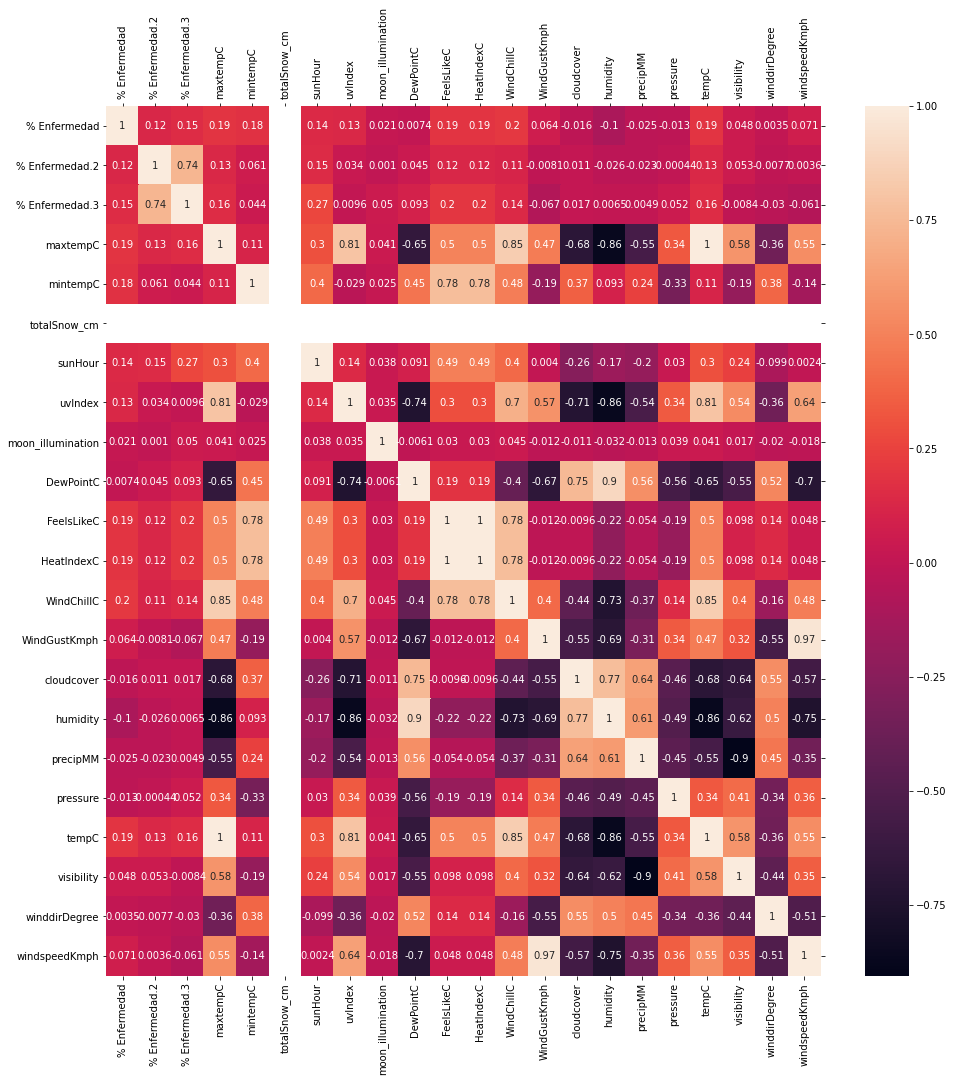

In [ ]:
plt.figure(figsize=(16, 16))
corr_weather = sns.heatmap(merged.corr(), annot=True)
corr_weather.tick_params(right=True, top=True, labeltop=True)
plt.xticks(rotation='vertical')
# plt.savefig('corr_weather')
plt.show()


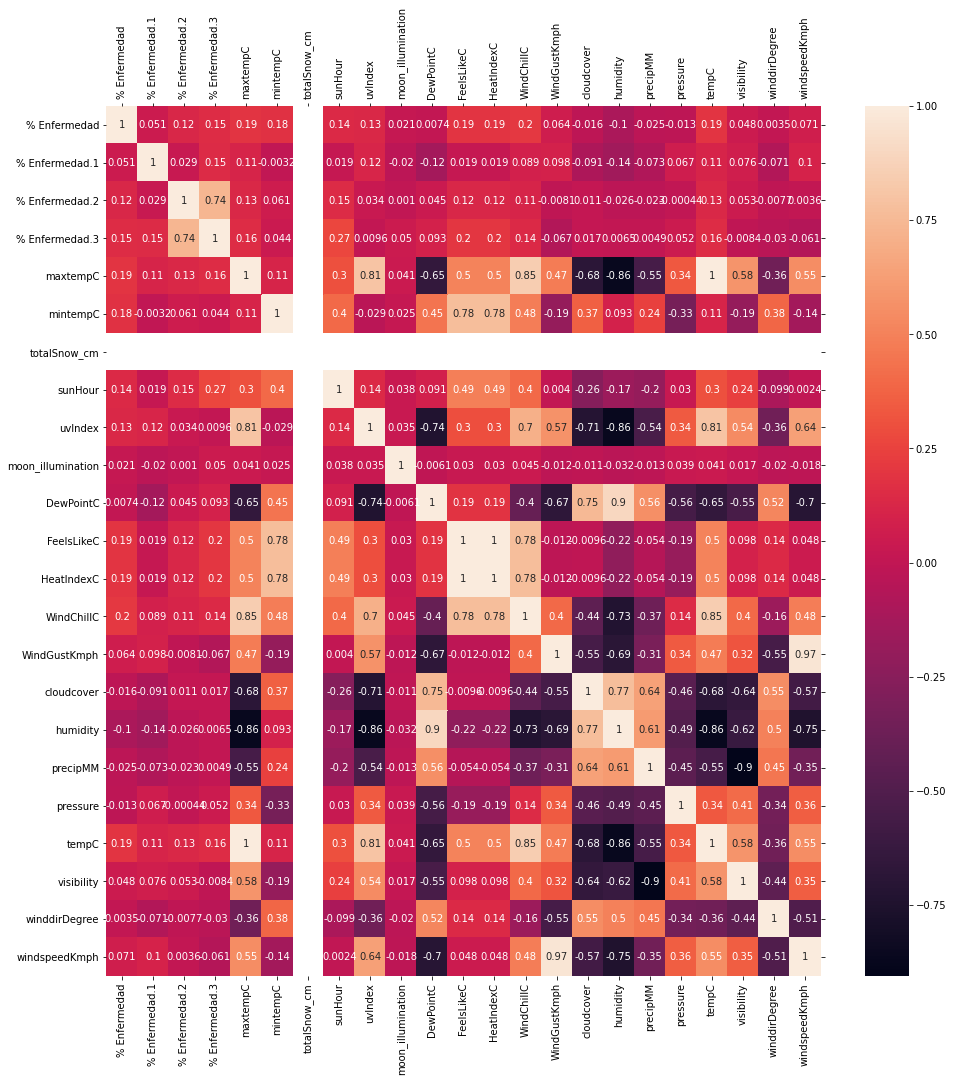

In [ ]:
plt.figure(figsize=(16, 16))
corr_weather = sns.heatmap(merged.corr(), annot=True)
corr_weather.tick_params(right=True, top=True, labeltop=True)
plt.xticks(rotation='vertical')
# plt.savefig('corr_weather')
plt.show()


In [3]:
pd.read_csv('w_historic.csv').describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,22740.000000,22740.000000,22740.0,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000,22740.000000
mean,33.586983,24.202243,0.0,10.947062,6.993008,46.077573,20.664776,30.740325,30.740325,28.100088,15.292260,26.729507,66.945558,5.170510,1011.582894,33.586983,9.606464,111.734609,10.145998
std,2.600654,1.683717,0.0,1.805084,0.829072,31.237222,2.458590,1.811753,1.811753,1.633974,6.531873,18.388464,12.002178,13.124404,1.300775,2.600654,0.784016,48.606826,4.574297
min,24.000000,16.000000,0.0,5.700000,5.000000,0.000000,13.000000,25.000000,25.000000,22.000000,5.000000,0.000000,40.000000,0.000000,1006.000000,24.000000,4.000000,24.000000,3.000000
25%,32.000000,23.000000,0.0,8.700000,6.000000,18.000000,19.000000,29.000000,29.000000,27.000000,10.000000,12.000000,57.000000,0.000000,1011.000000,32.000000,9.000000,75.000000,6.000000
50%,34.000000,24.000000,0.0,11.600000,7.000000,46.000000,21.000000,31.000000,31.000000,28.000000,14.000000,22.000000,67.000000,0.300000,1012.000000,34.000000,10.000000,99.000000,9.000000
75%,35.000000,25.000000,0.0,12.700000,8.000000,73.000000,23.000000,32.000000,32.000000,29.000000,20.000000,36.000000,76.000000,6.100000,1012.000000,35.000000,10.000000,139.000000,13.000000
max,40.000000,29.000000,0.0,12.900000,8.000000,100.000000,25.000000,37.000000,37.000000,33.000000,38.000000,100.000000,97.000000,413.400000,1016.000000,40.000000,10.000000,301.000000,27.000000
